# Final Project Template

For the final project for this module, you are asked to use data analysis techniques and linear regression to create a model to predict housing prices. 

In Video 7.9, Dr. Williams presented you with an example of data analysis in which housing prices were predicted by using just the columns `OverallQual` and `MassVnrArea` from the data provided. In Video 7.10, Dr. Williams showed more examples of data visualization and manipulation in addition to a more detailed analysis of the data.

Your challenge in this project is to improve Dr. Williams' results from Video 7.9 by choosing different variables in the *dataframe* to create your model. Although in Video 7.10 you are offered a sample data analysis which uses five columns from the data provided, your project submission must include an analysis of at least three additional variables and offer other solutions that improve the results obtained by Dr. Williams in these two videos.

Before you fill out the project outline template below, make sure you:

- Read through the template completely to understand the instructions for the structure of the project.
- Have a clear understanding of what to do to create a model that will return the results you want to find.
- Use Markdown to edit the template.

<div class="alert alert-block alert-success">
The purpose of this Jupyter Notebook is to give you a structure to follow when you are solving your problem and developing your model with Python. Make sure you follow it carefully. You can add more subsections if needed, but remember to fill out every section provided in the template.
</div>

<div class="alert alert-block alert-danger">
Delete all cells above, including this one, before submitting your final Notebook.
</div>

# Predicting Housing Prices

**Katherine Leon Chambi**



# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project aims to predict housing prices by employing a Linear Regression model implemented in Python. By utilizing a dataset consisting of various independent variables, the model seeks to accurately estimate housing prices. The project focuses on exploring the impact of incorporating additional independent variables on the predictive performance of the model. 

Through this experimentation, it is observed that the inclusion of more independent variables in the Linear Regression model leads to improved outcomes in predicting housing prices. The results demonstrate that by considering a comprehensive range of factors, the model can capture the complex relationships between independent variables and housing prices more effectively. This expanded feature set allows for a more nuanced and precise estimation of housing prices, enhancing the overall predictive capabilities of the model. The outcomes provide valuable insights for real estate professionals, investors, and policymakers seeking accurate housing price estimations  

[Back to top](#Index)


## 1. Introduction

Predicting housing prices is a common and crucial task in the real estate market. With the advancements in machine learning and data analysis techniques, it has become possible to build accurate prediction models using various algorithms. This project focuses on using linear regression, a popular and widely used algorithm, to predict housing prices. A model will be implemented by using Python and Jupyter Notebook as well as libraries such as numpy, pandas, matplotlib, sklearn, which provide a convenient and interactive environment for data analysis and model development. 

To solve the problem of predicting housing prices, the following steps will be applied: 

**1. Data Collection**: The first step is to gather a comprehensive dataset that includes relevant features to make predictions. This data has been given with the name “houseSmallData.” 

**2. Data Preprocessing**: This step involves techniques like data cleaning, imputation, and normalization to ensure that the data is in a suitable format for analysis.

**3. Feature Engineering**: This is a crucial step for building an effective prediction model. It involves selecting and transforming the relevant features to enhance the predictive power of the model. 

**4. Model Training**: This step proceeds to train the linear regression model by splitting the dataset into training and testing sets, where the training set will be used to train the model, and the testing set will be used to evaluate its performance. 

**5. Model Evaluation**: To assess the performance of the prediction model, this will be evaluated by the R-squared score metric. It will be shown how well the model fits the data and how accurately it predicts housing prices. 

**6. Prediction**: Once getting a good model's performance, it can be utilized to make predictions on new, unseen data.  

[Back to top](#Index)

## 2. The Data

The following steps will include how the data was imported, explored, prepared, and correlated. 

[Back to top](#Index)

### 2.1 Import the Data

This step involves importing the numpy, pandas, matplotlib.pyplot, sklearn librariries. Then, the data will be loaded and shaped. 100 variables will be picked and trained from the dataset. By looking at the shape, there are 100 rows and 82 columns. See the code below.   

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 

data = pd.read_csv('houseSmallData.csv') 
data.shape 
train = data.iloc[0:100,:] 
train.shape 
train 
data.shape

(100, 82)

[Back to top](#Index)

### 2.2 Data Exploration

First, sale price will get trained and described to get the mean, standard deviation, minimum, maximum, etc. By plotting sale price in a histogram, it is certainly not normally distributed. Code and graph are shown below. 

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

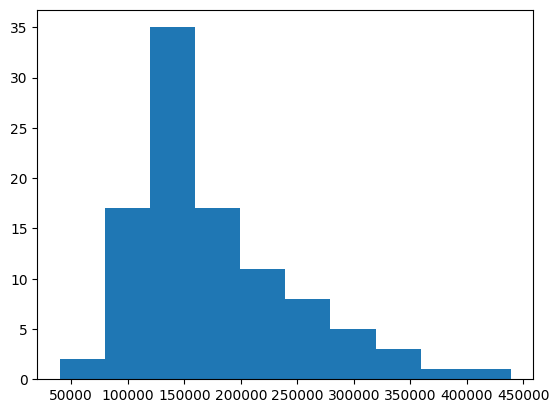

In [5]:
salePrice = train['SalePrice'] 
salePrice.describe() 
plt.hist(salePrice) 

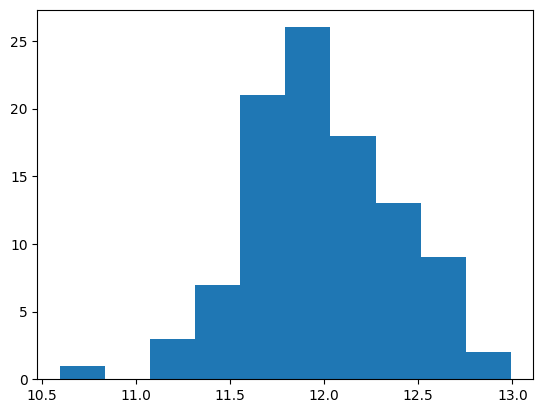

In [6]:
plt.hist(np.log(salePrice))
np.log(salePrice).skew()
target = np.log(salePrice)

To analyze the correlation of some variables, we will use the plot scatter function first with Ground Living Area against 'y' equals target. We can see below that there is a correlation between the living area and that target

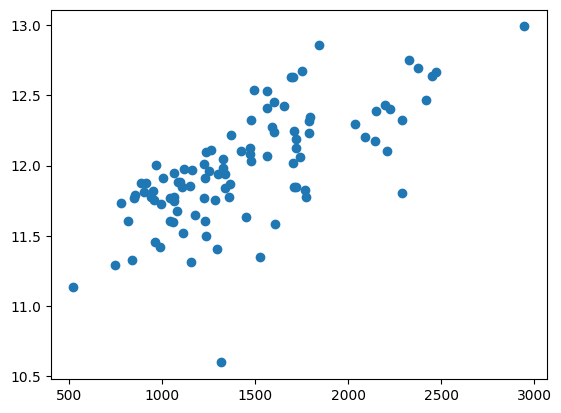

In [7]:
plt.scatter(train['GrLivArea'], y=target) 

Now, let's see if the garage area is correlated with the target. We can also see that it has a good correlation.  

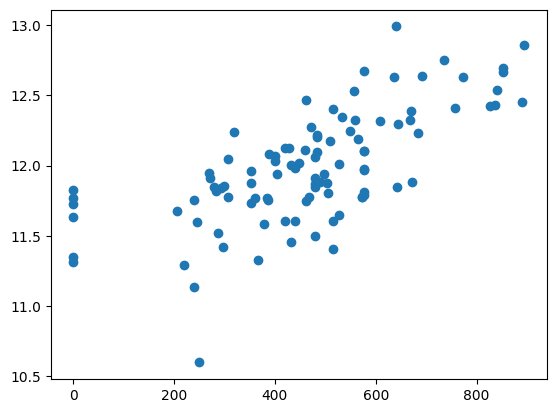

In [8]:
plt.scatter(train['GarageArea'], y=target)

[Back to top](#Index)

### 2.3 Data Preparation

This step will be done before splitting the data into train & test. We will determine if there are any missing values (NaN) in the data. To clean the data, we will first find the nulls in the data by using 'train' and 'isnull' on a descending form. By printing the first 20 values, we see that Pool has 100 nulls, Alley has 94, MiscFeature has 91. The values with higher nulls should not be analyzed. The ones with fewer nulls can still be used if they are repaired. Code and results as shown below. 

In [9]:
#Finding nulls in the Data 
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[0:20]) 
nulls

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
MasVnrType,60
FireplaceQu,54
LotFrontage,14
GarageType,6
GarageYrBlt,6
GarageFinish,6


By taking out the data frame and leaving train, we will get the same results without the visual aspects of a data frame anymore. If we look at the type, we will see that it is a panda series. See code below. 

In [10]:
#Finding nulls without creating a data frame -> type is a Panda series, still same 
nulls = train.isnull().sum().sort_values(ascending=False)[0:20] 
type(nulls) 

pandas.core.series.Series

Once identifying the variables with fewer nulls, we will repair them by operating on the training data. We will select the data types that np.number and interpolate. This gives us the 100 rows of the data and 39 columns left in the data. See code and results below.

In [11]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1) 
sum(data.isnull().sum() !=0) 
data.shape 

(100, 39)

[Back to top](#Index)

### 2.4 Correlation

In this step, we will find the correlations here. By calculating the correlation factor, we will determine which columns are important for us to include in our model. We need to find what is best correlated to 'SalePrice'. So, this will give me what's correlated with the 'SalePrice'. We can 'sort_values' by using '(ascending=False)', so we will have the most important at the top and the least important on the bottom. We will select 12 variables besides 'Sale Price.' These are: 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea', 'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd.' We will get the index of this because we need an array that has those columns in it. See code and results below. 

In [13]:
## get numeric columns:
numeric = data.select_dtypes(include=[np.number])
numeric.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
# find numeric values that are correlated and good candidates to be included in the 
corr = numeric.corr() 
cols = corr['SalePrice'].sort_values(ascending=False)[0:13].index 
cols 

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd'],
      dtype='object')


[Back to top](#Index)

## 3. Project Description

The aim of this project is to develop a prediction model for housing pricing and demonstrate how selecting more variables in a linear regression model can lead to a better prediction model. We will utilize the power of Python to implement this analysis.  

Linear regression is used for predicting a continuous outcome variable based on one or more input variables. By including more variables in the model, we can capture additional information and potentially improve the accuracy of our predictions. 

To accomplish this, we will import the dataset containing the target variable (Sale Price) and multiple potential predictor variables through correlation as shown above in the Data - correlation section, where we selected 12 variables to predict Sale Price. These variables are: 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea', 'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd.' We can confirm this by plotting each variable against a y target as shown below. 

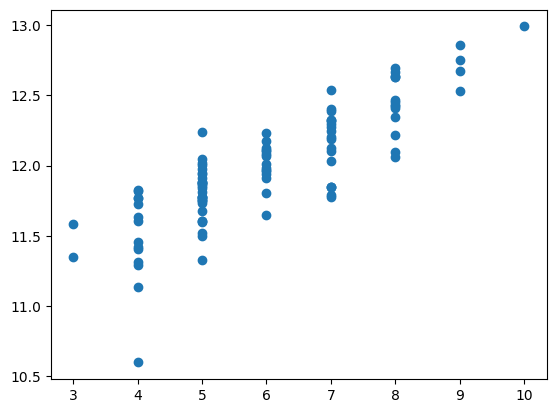

In [15]:
plt.scatter(train['OverallQual'], y=target) 

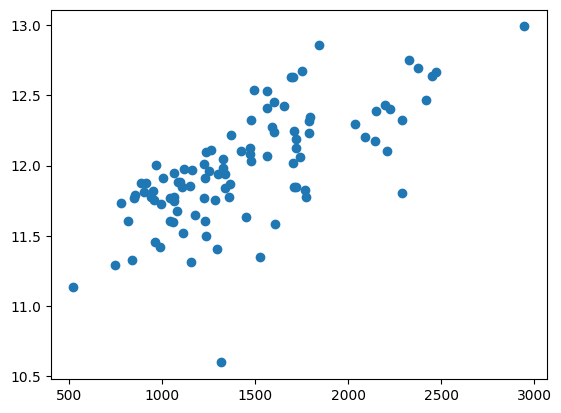

In [16]:
plt.scatter(train['GrLivArea'], y=target) 

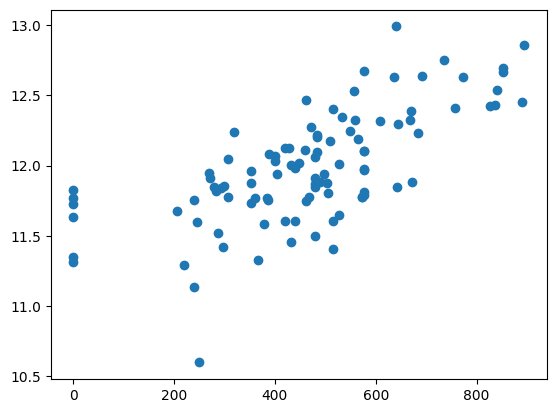

In [17]:
plt.scatter(train['GarageArea'], y=target) 

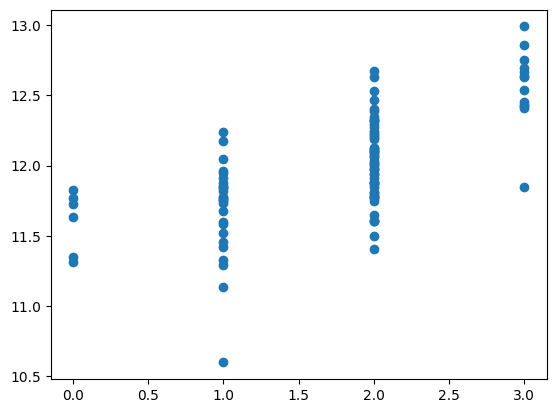

In [18]:
plt.scatter(train['GarageCars'], y=target)

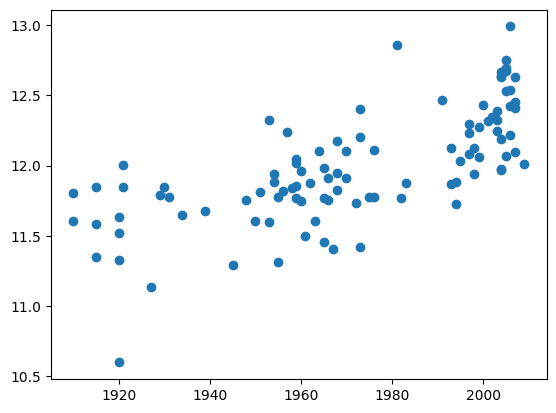

In [19]:
plt.scatter(train['YearBuilt'], y=target) 

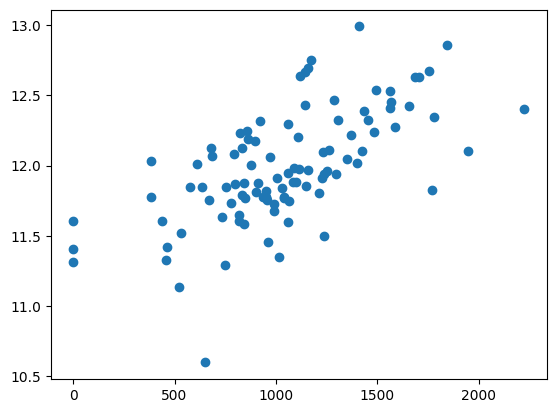

In [20]:
plt.scatter(train['TotalBsmtSF'], y=target)

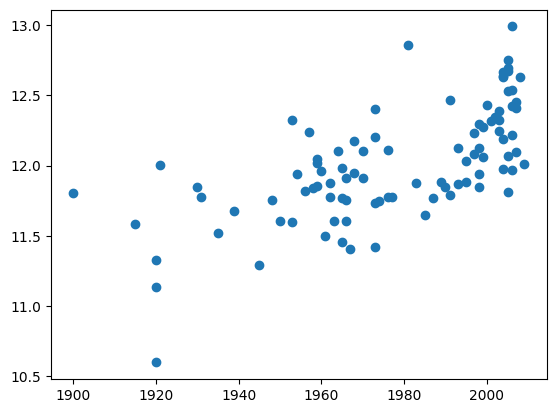

In [21]:
plt.scatter(train['GarageYrBlt'], y=target) 

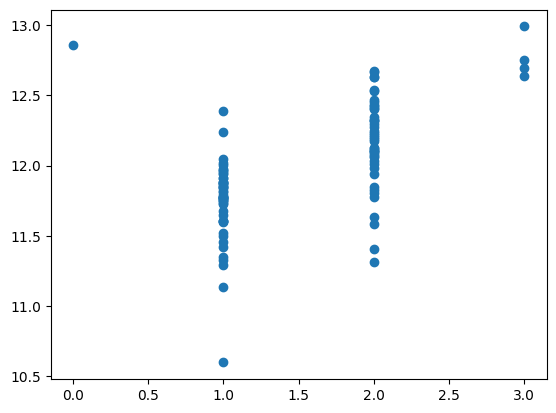

In [23]:
plt.scatter(train['FullBath'], y=target)

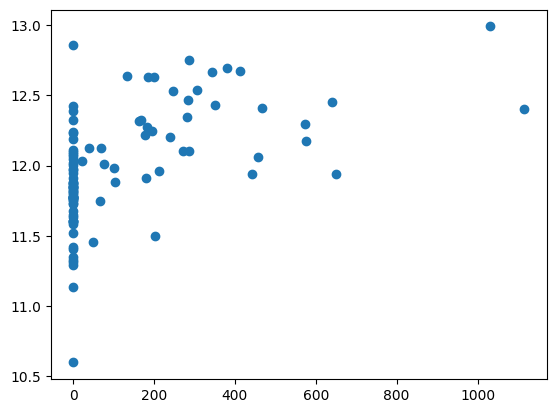

In [24]:
plt.scatter(train['MasVnrArea'], y=target)

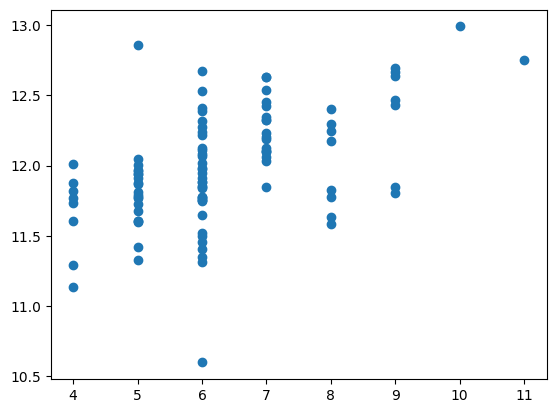

In [25]:
plt.scatter(train['TotRmsAbvGrd'], y=target)

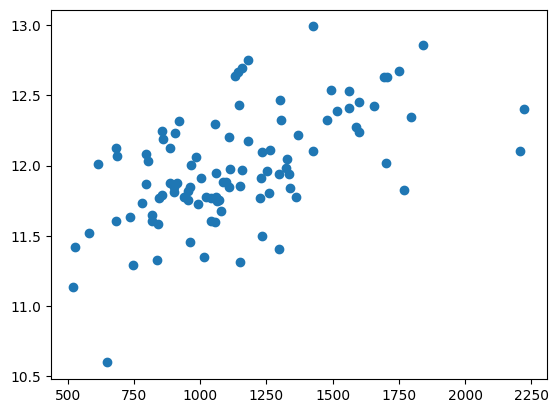

In [26]:
plt.scatter(train['1stFlrSF'], y=target)

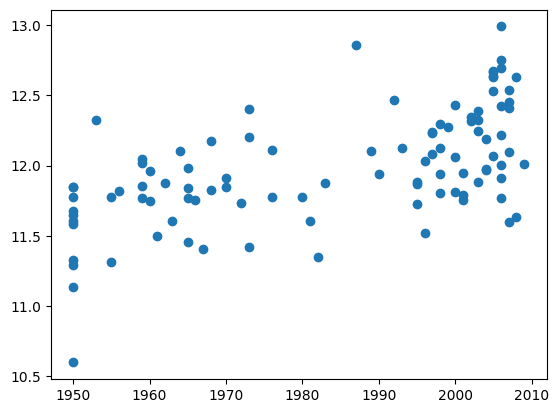

In [27]:
plt.scatter(train['YearRemodAdd'], y=target)

[Back to top](#Index)

### 3.1 Linear Regression

The sklearn Linear Regression algorithm is a powerful tool for predicting housing prices based on a set of input features. This algorithm leverages the principles of linear regression, a statistical technique that models the relationship between a dependent variable (Sale Price) and one or more independent variables (previously selected by looking at their correlation to Sale Price). 

The theory behind linear regression dates back to the early 19th century, with its roots in the works of the mathematician Carl Friedrich Gauss. The algorithm aims to find the best-fitting linear relationship between the input features and the target variable by minimizing the sum of squared residuals. This is achieved through the Ordinary Least Squares (OLS) method, which estimates the coefficients of the linear equation that minimize the sum of the squared differences between the predicted and actual values (Kopf, 2015). 

In the context of housing price prediction, we will denote the target variable as 'y' (Sale Price) and the independent variables as 'x1', 'x2', ..., 'xn' ('OverallQual', 'GrLivArea', 'GarageArea', etc.). The linear regression model assumes that the relationship between these variables can be expressed as: 

y = β0 + β1x1 + β2x2 + ... + βn*xn + ε 

Here, β0 represents the intercept term, β1, β2, ..., βn are the coefficients associated with the independent variables, and ε is the error term. The goal is to estimate the values of β0, β1, β2, ..., βn that minimize the sum of the squared residuals (Kopf, 2015). 

To implement the sklearn Linear Regression algorithm in Python, we need to follow these steps: 

**1. Data Collection:** Collect a dataset containing housing prices as the target variable and relevant features as independent variables. This dataset should include both training and testing data. 

**2. Data Preprocessing:** Perform necessary data preprocessing steps, such as handling missing values, encoding categorical variables, and scaling numeric features. 

**3. Splitting the Data:** Split the dataset into training and testing sets. The training set is used to build the linear regression model, while the testing set is used to evaluate its performance. 

**4. Model Initialization:** Initialize an instance of the Linear Regression model from the sklearn library. This creates an object that can be used to fit the model to the training data. 

**5. Model Training:** Fit the linear regression model to the training data using the fit() function. This process estimates the coefficients that best fit the data. 

**6. Model Evaluation:** Evaluate the performance of the trained model using the appropriate metric, R-squared. These metrics provide insights into how well the model predicts housing prices. 

**7. Model Prediction:** Use the trained model to make predictions on new, unseen data. This allows us to estimate housing prices based on the input features. 

By following these steps, we can implement the sklearn Linear Regression algorithm in Python and create a housing price prediction model. This algorithm provides a robust and interpretable approach to estimate housing prices based on relevant features, enabling individuals and organizations to make informed decisions in real estate.  



[Back to top](#Index)

### 3.2 Analysis 

In this step, we will implement the sklearn algorithm to the data. We will use three different sets of variables. See code below. 

In [28]:
#Create train_x cols and train_y = SalesPrice (8 variables) 
cols1 = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 
'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath'] 
train1 = data [cols1] 
train_y1 = train1['SalePrice'] 
train_x1 = train1.drop(['SalePrice'], axis=1) 

from sklearn import linear_model 
lr1 = linear_model.LinearRegression() 
model1 = lr1.fit(train_x1, train_y1) 
predictions1 = model1.predict(train_x1) 
print(f"R^2 is: {model1.score(train_x1,train_y1)}") 


R^2 is: 0.8508305344209255


In [30]:
train_x1

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath
0,7,1710,548,2,2003,856,2003.0,2
1,6,1262,460,2,1976,1262,1976.0,2
2,7,1786,608,2,2001,920,2001.0,2
3,7,1717,642,3,1915,756,1998.0,1
4,8,2198,836,3,2000,1145,2000.0,2
...,...,...,...,...,...,...,...,...
95,6,1470,420,2,1993,680,1993.0,2
96,7,1588,472,2,1999,1588,1999.0,2
97,4,960,432,1,1965,960,1965.0,1
98,5,835,366,1,1920,458,1920.0,1


In [31]:
train_y1

0     208500
1     181500
2     223500
3     140000
4     250000
       ...  
95    185000
96    214000
97     94750
98     83000
99    128950
Name: SalePrice, Length: 100, dtype: int64

(array([ 2.,  5.,  9., 30., 25., 15.,  8.,  3.,  1.,  2.]),
 array([-73372.7486181 , -56707.15631117, -40041.56400424, -23375.97169731,
         -6710.37939039,   9955.21291654,  26620.80522347,  43286.3975304 ,
         59951.98983733,  76617.58214425,  93283.17445118]),
 <BarContainer object of 10 artists>)

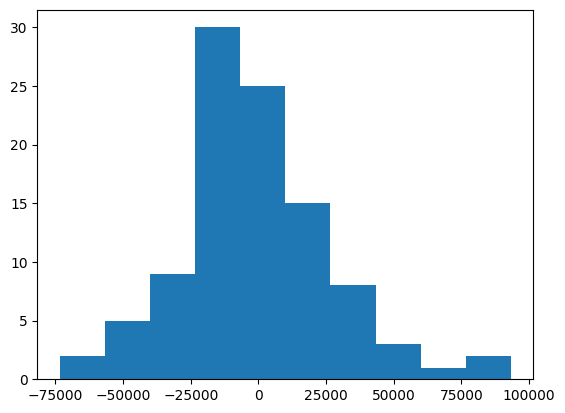

In [34]:
plt.hist(train_y1 - predictions1) 

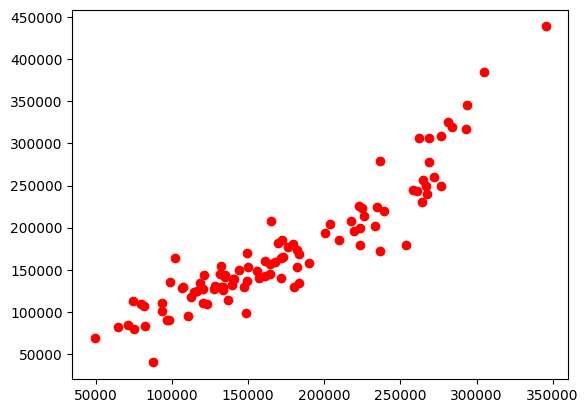

In [35]:
plt.scatter(predictions1, train_y1, color ='r')

In [38]:
# Create train_x cols and train_y = SalesPrice (10 variables) 
cols2 = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 
'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea', 'TotRmsAbvGrd'] 
train2 = data [cols2] 
train_y2 = train2['SalePrice'] 
train_x2 = train2.drop(['SalePrice'], axis=1) 

from sklearn import linear_model 
lr2 = linear_model.LinearRegression() 
model2 = lr2.fit(train_x2, train_y2) 
predictions2 = model2.predict(train_x2) 
print(f"R^2 is: {model2.score(train_x2,train_y2)}") 

R^2 is: 0.8517354506353318


In [39]:
train_x2

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd
0,7,1710,548,2,2003,856,2003.0,2,196.0,8
1,6,1262,460,2,1976,1262,1976.0,2,0.0,6
2,7,1786,608,2,2001,920,2001.0,2,162.0,6
3,7,1717,642,3,1915,756,1998.0,1,0.0,7
4,8,2198,836,3,2000,1145,2000.0,2,350.0,9
...,...,...,...,...,...,...,...,...,...,...
95,6,1470,420,2,1993,680,1993.0,2,68.0,6
96,7,1588,472,2,1999,1588,1999.0,2,183.0,6
97,4,960,432,1,1965,960,1965.0,1,48.0,6
98,5,835,366,1,1920,458,1920.0,1,0.0,5


In [40]:
train_y2

0     208500
1     181500
2     223500
3     140000
4     250000
       ...  
95    185000
96    214000
97     94750
98     83000
99    128950
Name: SalePrice, Length: 100, dtype: int64

(array([ 2.,  4.,  7., 22., 29., 18.,  9.,  5.,  2.,  2.]),
 array([-74711.30459464, -58456.46643905, -42201.62828346, -25946.79012786,
         -9691.95197227,   6562.88618333,  22817.72433892,  39072.56249451,
         55327.40065011,  71582.2388057 ,  87837.07696129]),
 <BarContainer object of 10 artists>)

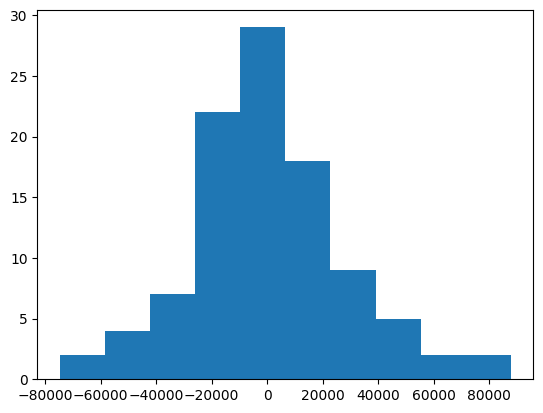

In [41]:
plt.hist(train_y2 - predictions2)  

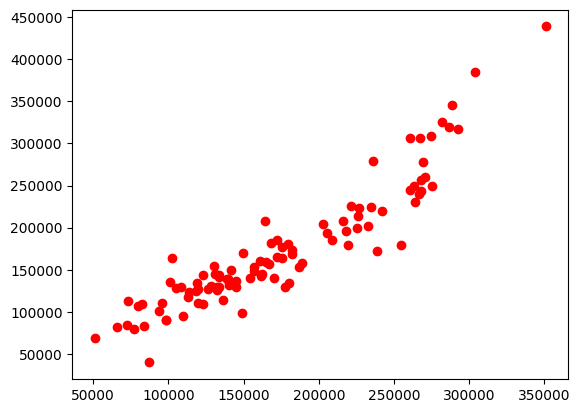

In [42]:
plt.scatter(predictions2, train_y2, color ='r')

In [43]:
# Create train_x cols and train_y = SalesPrice (12 variables) 

cols3 = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 
'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea', 'TotRmsAbvGrd','1stFlrSF', 'YearRemodAdd'] #add 2 more 
train3 = data [cols3] 
train_y3 = train3['SalePrice'] 
train_x3= train3.drop(['SalePrice'], axis=1) 

from sklearn import linear_model 
lr3 = linear_model.LinearRegression() 
model3 = lr3.fit(train_x3, train_y3) 
predictions3 = model3.predict(train_x3) 
print(f"R^2 is: {model3.score(train_x3,train_y3)}") 


R^2 is: 0.8559416534609253


In [44]:
train_x3

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd,1stFlrSF,YearRemodAdd
0,7,1710,548,2,2003,856,2003.0,2,196.0,8,856,2003
1,6,1262,460,2,1976,1262,1976.0,2,0.0,6,1262,1976
2,7,1786,608,2,2001,920,2001.0,2,162.0,6,920,2002
3,7,1717,642,3,1915,756,1998.0,1,0.0,7,961,1970
4,8,2198,836,3,2000,1145,2000.0,2,350.0,9,1145,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,1470,420,2,1993,680,1993.0,2,68.0,6,680,1993
96,7,1588,472,2,1999,1588,1999.0,2,183.0,6,1588,1999
97,4,960,432,1,1965,960,1965.0,1,48.0,6,960,1965
98,5,835,366,1,1920,458,1920.0,1,0.0,5,835,1950


In [45]:
train_y3

0     208500
1     181500
2     223500
3     140000
4     250000
       ...  
95    185000
96    214000
97     94750
98     83000
99    128950
Name: SalePrice, Length: 100, dtype: int64

(array([ 2.,  1.,  9., 21., 30., 18., 11.,  5.,  1.,  2.]),
 array([-77972.5113307 , -61304.40241137, -44636.29349203, -27968.18457269,
        -11300.07565336,   5368.03326598,  22036.14218531,  38704.25110465,
         55372.36002398,  72040.46894332,  88708.57786265]),
 <BarContainer object of 10 artists>)

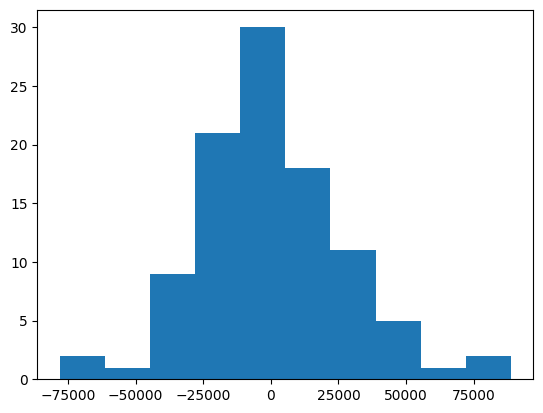

In [47]:
plt.hist(train_y3 - predictions3) 

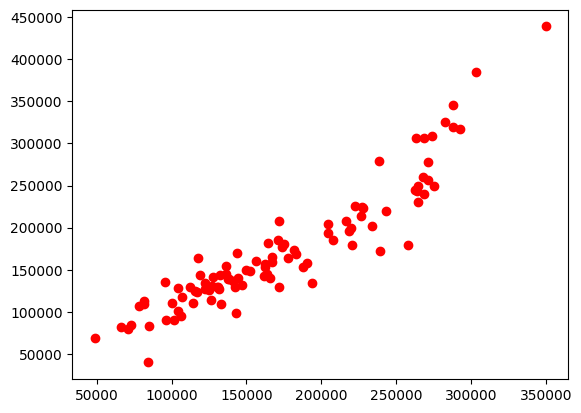

In [48]:
plt.scatter(predictions3, train_y3, color ='r') 

[Back to top](#Index)

### 3.3 Results

The first set of eight variables applied to the model reflected an R^2 of 0.8508305344209255, a better linear regression graph and a better normal distribution in the histogram compared to the one obtained in the data exploration section. 

The second set of ten variables applied to the model reflected an R^2 of 0.8517354506353318, a better linear regression graph and a better normal distribution in the histogram compared to the one obtained in the first set of variables. 

The third set of twelve variables applied to the model reflected an R^2 of 0.8559416534609253, a better linear regression graph and a better normal distribution in the histogram compared to the one obtained in the second set of variables. 

Through this iterative process, we observe an improvement in the prediction model as we incorporate more informative variables. By demonstrating the impact of variable selection on the linear regression model's performance, this project emphasizes the importance of thoughtful feature engineering and highlights the potential for enhancing prediction accuracy through the inclusion of relevant variables. 

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Lastly, we will test the 3 different models against test data to confirm its accuracy on new data. Test data is given with the name “jtest.csv.” See code below.  

In [49]:
#Test model against unseen data 
test_J = pd.read_csv('jtest.csv') 
test_J.shape 
test_J.head() 

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [50]:
test = test_J.iloc[0:100,:] 
test.shape 
test_J.shape 

(100, 82)

In [51]:
#Finding nulls without creating a data frame -> type is a Panda series, still same 
nulls_t = test.isnull().sum().sort_values(ascending=False)[0:20] 
type(nulls_t) 
test_J = test.select_dtypes(include=[np.number]).interpolate().dropna(axis=1) 
sum(test_J.isnull().sum() !=0) 
test_J.shape

(100, 38)

In [52]:
#Create test_x and test_y = SalePrice (First Model) 

cols1 = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath'] 
test1 = test_J[cols1] 
test_y1 = test1['SalePrice'] 
test_x1 = test1.drop(['SalePrice'], axis=1) 

from sklearn import linear_model 
lr1 = linear_model.LinearRegression() 
model1t = lr1.fit(test_x1, test_y1) 
predictions1t = model1t.predict(test_x1) 
print(f"R^2 is: {model1t.score(test_x1, test_y1)}")

R^2 is: 0.8232857824219691


(array([ 2.,  2.,  4., 12., 34., 24., 12.,  7.,  2.,  1.]),
 array([-105676.05332988,  -84401.27759395,  -63126.50185802,
         -41851.72612209,  -20576.95038616,     697.82534977,
          21972.6010857 ,   43247.37682163,   64522.15255756,
          85796.92829349,  107071.70402943]),
 <BarContainer object of 10 artists>)

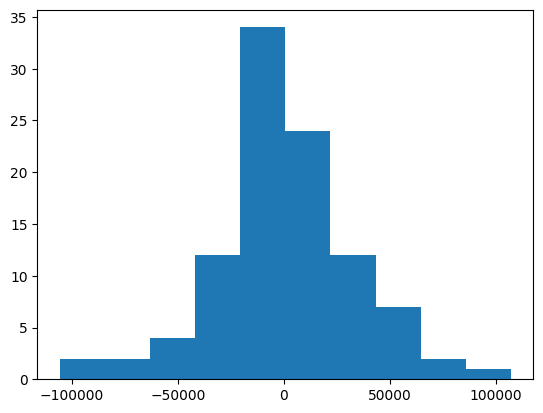

In [53]:
plt.hist(test_y1 - predictions1t)

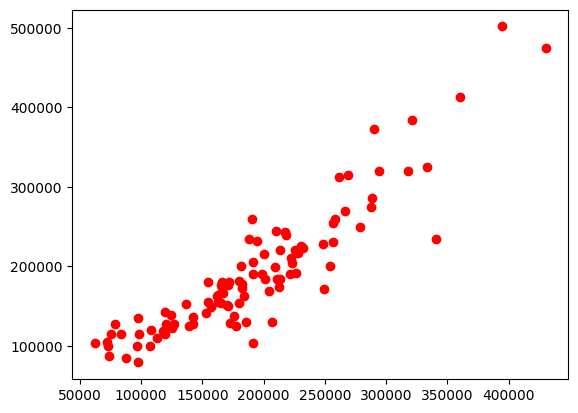

In [54]:
plt.scatter(predictions1t, test_y1, color ='r')

In [55]:
#Create test_x and test_y = SalePrice (Second Model) 
cols2 = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea', 'TotRmsAbvGrd']  
test2 = test_J[cols2] 
test_y2 = test2['SalePrice'] 
test_x2 = test2.drop(['SalePrice'], axis=1) 

from sklearn import linear_model 
lr2 = linear_model.LinearRegression() 
model2t = lr2.fit(test_x2, test_y2) 
predictions2t = model2t.predict(test_x2) 
print(f"R^2 is: {model2t.score(test_x2, test_y2)}") 

R^2 is: 0.824117152346634


(array([ 2.,  2.,  4., 13., 30., 26., 12.,  7.,  3.,  1.]),
 array([-101213.10036105,  -80875.23424463,  -60537.36812822,
         -40199.50201181,  -19861.6358954 ,     476.23022102,
          20814.09633743,   41151.96245384,   61489.82857026,
          81827.69468667,  102165.56080308]),
 <BarContainer object of 10 artists>)

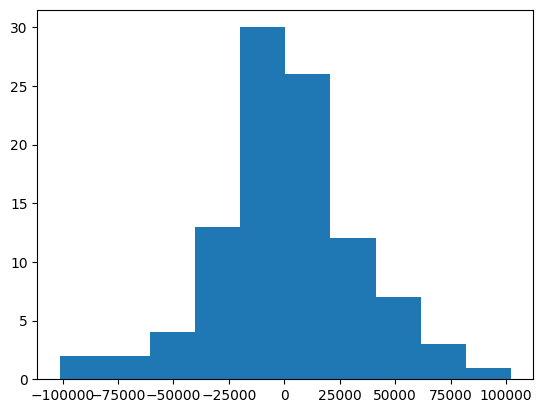

In [56]:
plt.hist(test_y2 - predictions2t)

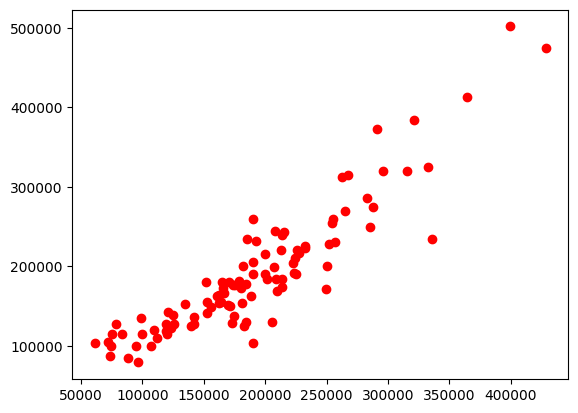

In [57]:
plt.scatter(predictions2t, test_y2, color ='r') 

In [58]:

#Create test_x and test_y = SalePrice (Third Model) 
cols3 = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea', 'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd'] 
test3 = test_J[cols3] 
test_y3 = test3['SalePrice'] 
test_x3 = test3.drop(['SalePrice'], axis=1) 

from sklearn import linear_model 
lr3 = linear_model.LinearRegression() 
model3t = lr3.fit(test_x3, test_y3) 
predictions3t = model3t.predict(test_x3) 
print(f"R^2 is: {model3t.score(test_x3, test_y3)}") 

R^2 is: 0.8339580076658991


(array([ 1.,  3.,  3., 17., 22., 27., 13., 10.,  3.,  1.]),
 array([-99566.39193925, -80038.45845872, -60510.5249782 , -40982.59149767,
        -21454.65801715,  -1926.72453662,  17601.2089439 ,  37129.14242443,
         56657.07590495,  76185.00938548,  95712.942866  ]),
 <BarContainer object of 10 artists>)

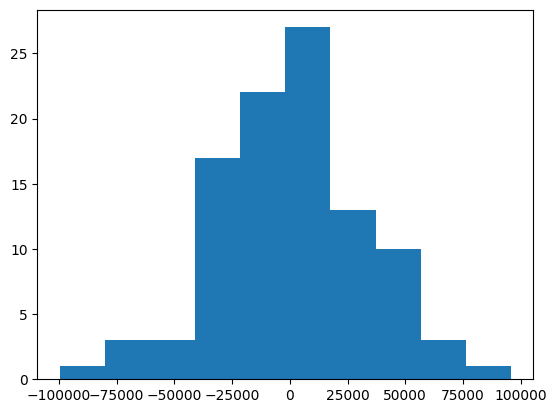

In [59]:
plt.hist(test_y3 - predictions3t)

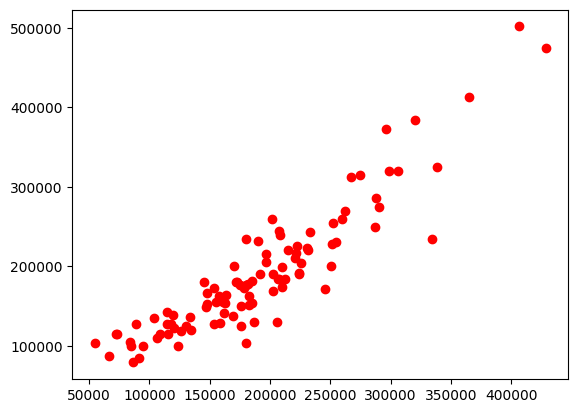

In [60]:
plt.scatter(predictions3t, test_y3, color ='r')

The results are not similar as we get better results when we add more independent variables to our model. This also gives a more accurate way to make predictions for the housing prices.

[Back to top](#Index)

## Conclusion

In conclusion, this project successfully utilized Linear Regression and Python to predict housing prices. By incorporating additional independent variables, the model achieved improved accuracy and performance. 

The approach of adding more independent variables proved to be beneficial for several reasons. Firstly, it increased the complexity of the model, allowing it to capture more nuances and factors that influence housing prices. It helped to mitigate potential biases and reduce the impact of confounding factors. By incorporating multiple factors that affect housing prices, the model could better account for variations and fluctuations in the market. This enhanced the robustness of the predictions and increased the model's ability to adapt to changing conditions. 

Creating this prediction model also involved various data analysis techniques. Firstly, exploratory data analysis (EDA) was conducted to gain insights into the dataset, identify patterns, and detect outliers or missing values. EDA helped in understanding the distribution and relationships between variables, enabling better feature selection.  

Feature engineering was another crucial technique used in this project. By transforming and combining variables, new features were created to enhance the predictive power of the model. Additionally, techniques such as data normalization, feature scaling, and handling categorical variables were applied to ensure the model's performance was not hindered by differences in data ranges or the nature of the variables. 

Therefore, the project's utilization of Linear Regression and Python, along with the inclusion of more independent variables, led to improved housing price predictions. Through this process, valuable data analysis techniques such as EDA, feature engineering, and data preprocessing were learned, enhancing the understanding and application of data science methodologies 


[Back to top](#Index
)
## References

- Scikit-Learn Developers. "scikit-learn: Machine Learning in Python." scikit-learn. Accessed 01 Jun. 2023. https://scikit-learn.org/stable/.Links to an external site.  

- Scikit-Learn Developers. “User Guide.” Scikit-Learn. Accessed 01 Jun. 2023. https://scikit-learn.org/stable/user_guide.html. 

- Kopf, Dan. "The Discovery of Statistical Regression." Priceoconomics. Accessed 01 Jun. 2023. https://priceonomics.com/the-discovery-of-statistical-regression/ 